In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

df=pd.read_csv("ML_final.csv")

In [3]:
df.isnull().sum() # Check for missing values

Gender                                                                        0
Do_you_have_a_dedicated_workspace_at_home?                                    0
Do_you_have_a_stable_&_fast_internet_connection_for_work?                     0
Do_you_use_noise-canceling_headphones_for_work?                               0
Do_you_prefer_working_from_home_over_the_office?                              0
Do_you_use_an_external_monitor_while_working_remotely?                        0
Do_you_feel_more_productive_at_home_than_in_the_office?                       0
Do_you_take_regular_breaks_while_working_remotely?                            0
Do_you_work_extra_hours_when_working_from_home?                               0
Do_you_use_time_management_tools/apps?                                        0
Do_you_use_productivity_techniques_(Pomodoro,_time_blocking,_etc.)?           0
Do_you_attend_virtual_meetings_with_the_camera_on?                            0
Do_you_prefer_asynchronous_communication

In [4]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df = df.replace({'Yes': 1, 'No': 0})
df = df.infer_objects(copy=False) 
df.head()

C:\Users\vello\AppData\Local\Temp\ipykernel_10008\2505941793.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


,Do_you_have_a_dedicated_workspace_at_home?,Do_you_have_a_stable_&_fast_internet_connection_for_work?,Do_you_use_noise-canceling_headphones_for_work?,Do_you_prefer_working_from_home_over_the_office?,Do_you_use_an_external_monitor_while_working_remotely?,Do_you_feel_more_productive_at_home_than_in_the_office?,Do_you_take_regular_breaks_while_working_remotely?,Do_you_work_extra_hours_when_working_from_home?,Do_you_use_time_management_tools/apps?,"Do_you_use_productivity_techniques_(Pomodoro,_time_blocking,_etc.)?",...,Do_you_prefer_asynchronous_communication_over_live_meetings?,Do_you_miss_in-person_interactions_with_colleagues?,Do_you_wear_professional_attire_during_remote_meetings?,Do_you_feel_virtual_meetings_are_as_effective_as_in-person_meetings?,Do_you_feel_socially_isolated_while_working_remotely?,Do_you_struggle_to_separate_work_and_personal_life_when_working_from_home?,Do_you_feel_you_have_a_good_work-life_balance_when_working_remotely?,Do_you_prefer_a_hybrid_work_model_(office_+_remote)?,Do_you_feel_companies_should_allow_permanent_work-from-home_options?,Gender_Male
0,1,1,0,0,1,0,1,0,0,0,...,1,0,1,0,1,1,0,1,0,False
1,1,1,1,0,0,0,1,1,1,0,...,0,1,1,0,0,0,0,1,0,False
2,0,1,0,1,0,0,1,0,0,0,...,1,1,0,1,0,0,1,1,1,True
3,1,1,0,0,0,1,0,1,0,0,...,0,1,1,0,1,1,1,1,1,False
4,0,0,0,1,0,0,1,0,1,1,...,0,0,0,1,1,1,0,1,1,True


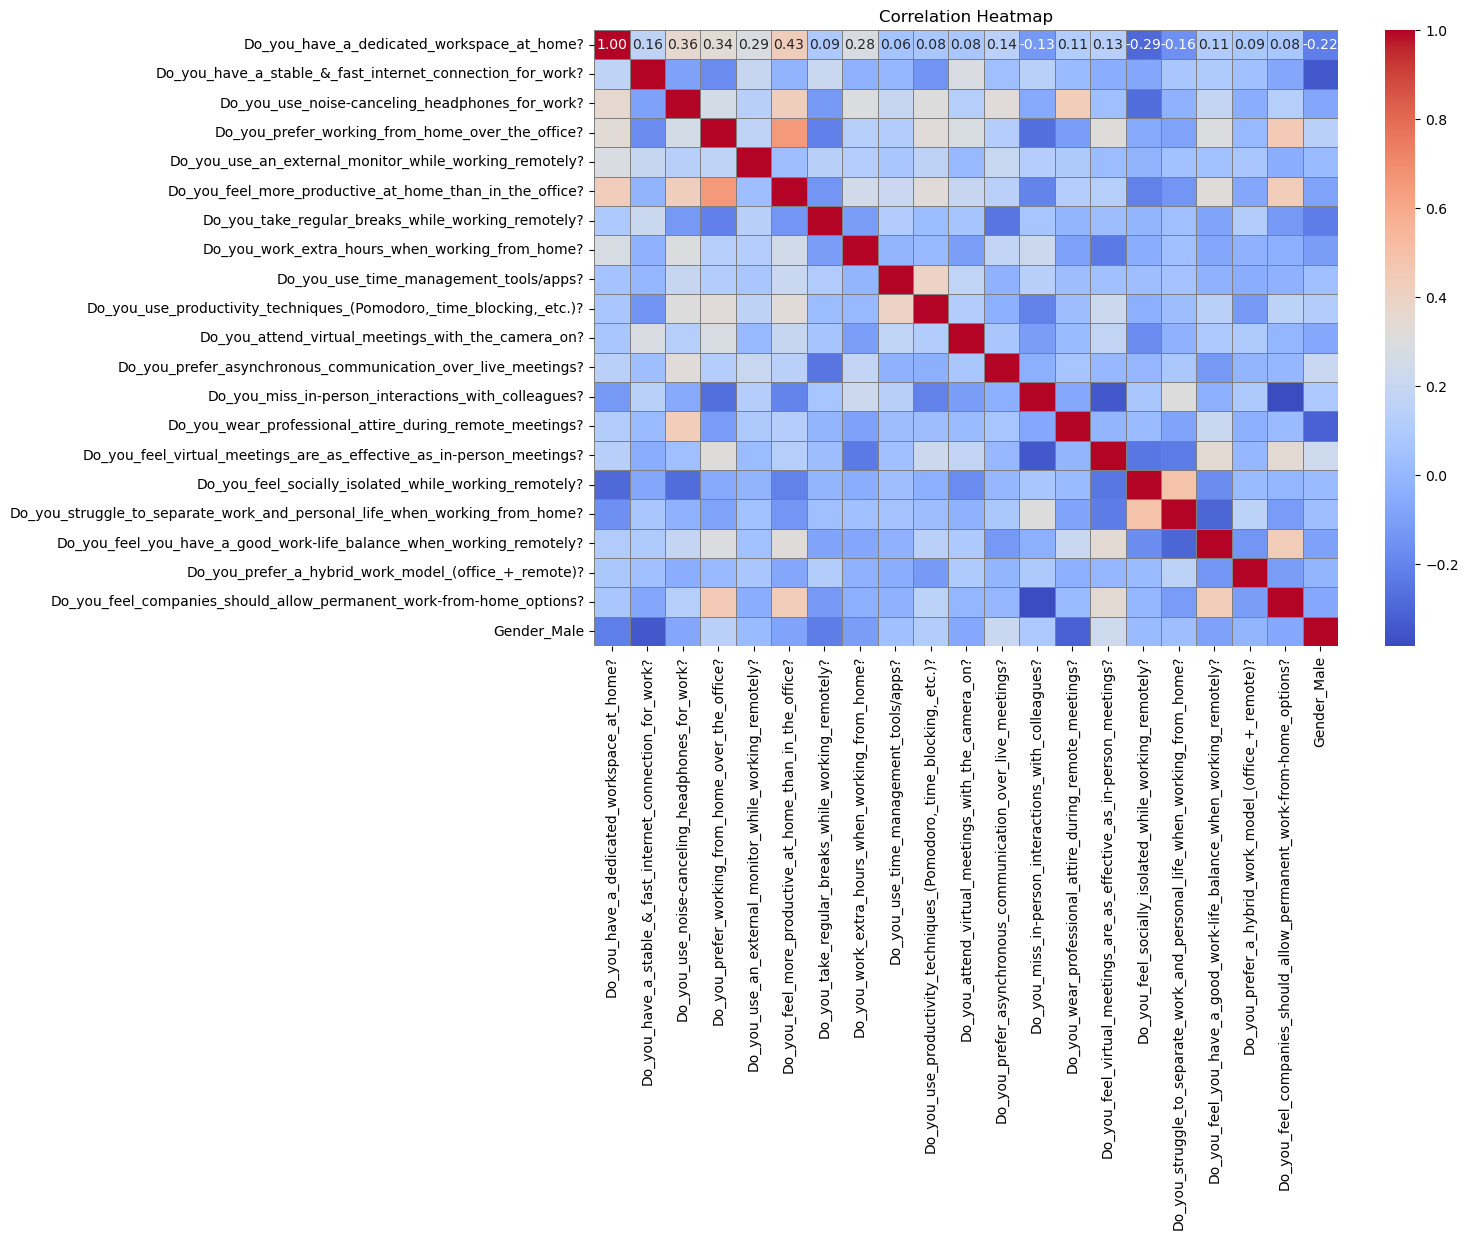

In [16]:
corr_mat=df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
target=['Do_you_prefer_working_from_home_over_the_office?']

X = df.drop(columns=target)
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
l_reg=LogisticRegression(max_iter=1000)
l_reg.fit(X_train_scaled, y_train)
y_pred_lr = l_reg.predict(X_test_scaled)
target_names = y_test.columns

print(f"\nConfusion Matrix of '{target_names}':")
print(confusion_matrix(y_test,y_pred_lr))
print(f"\nClassification Report for '{target_names}':")
print(classification_report(y_test, y_pred_lr))


Confusion Matrix of 'Index(['Do_you_prefer_working_from_home_over_the_office?'], dtype='object')':
[[24  4]
 [ 0 64]]

Classification Report for 'Index(['Do_you_prefer_working_from_home_over_the_office?'], dtype='object')':
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.94      1.00      0.97        64

    accuracy                           0.96        92
   macro avg       0.97      0.93      0.95        92
weighted avg       0.96      0.96      0.96        92



c:\Users\vello\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


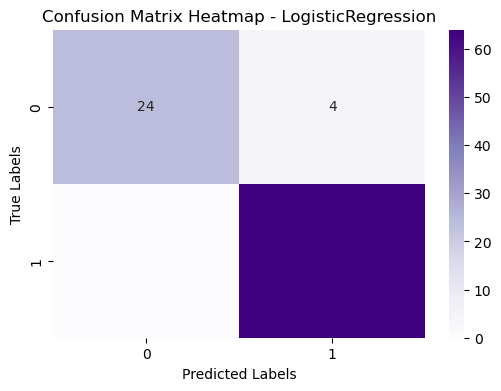

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test,y_pred_lr),
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
    )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - LogisticRegression')
plt.show()

In [11]:
mlp=rf_model= MLPClassifier(hidden_layer_sizes=[100,100,100],max_iter=1000)
mlp.fit(X_train_scaled,y_train)
y_pred_ann=mlp.predict(X_test_scaled)

print("\nConfusion Matrix :")
print(confusion_matrix(y_test,y_pred_ann))
print("\nClassification Report for:")
print(classification_report(y_test, y_pred_ann))

c:\Users\vello\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Confusion Matrix :
[[25  3]
 [ 0 64]]

Classification Report for:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.96      1.00      0.98        64

    accuracy                           0.97        92
   macro avg       0.98      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92



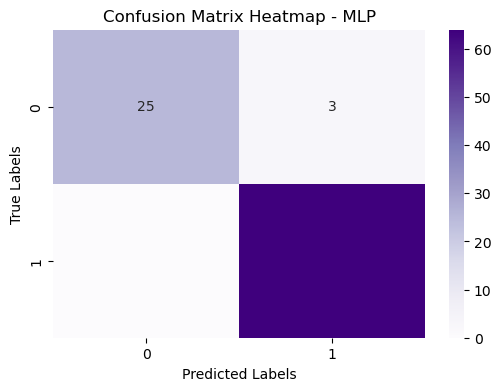

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test,y_pred_ann),
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
    )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - MLP')
plt.show()

In [13]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_rf))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_rf))

c:\Users\vello\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Confusion Matrix:
[[25  3]
 [ 0 64]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.96      1.00      0.98        64

    accuracy                           0.97        92
   macro avg       0.98      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92



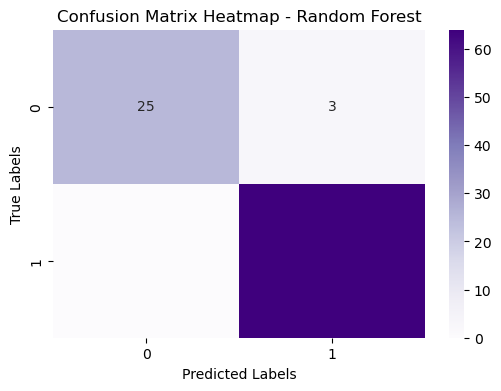

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test,y_pred_rf),
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
    )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.show()

In [19]:
model_names = ['Logistic Regression', 'MLP Classifier', 'Random Forest']
model_preds = [y_pred_lr, y_pred_ann, y_pred_rf]

accuracies = []

for preds in model_preds:
    label_accuracies = []
    for i in range(y_test.shape[1]):
        acc = accuracy_score(y_test, preds)
        label_accuracies.append(acc)
    avg_acc = np.mean(label_accuracies)
    accuracies.append(avg_acc * 100)

accuracy_summary = pd.DataFrame({
    'Model': model_names,
    'Average Accuracy (%)': accuracies
})

print(accuracy_summary.sort_values(by='Average Accuracy (%)', ascending=False).to_string(index=False))

              Model  Average Accuracy (%)
     MLP Classifier             96.739130
      Random Forest             96.739130
Logistic Regression             95.652174
